In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk. stem import WordNetLemmatizer 
from wordcloud import WordCloud

%matplotlib inline

In [2]:
df = pd.read_csv('data/real.csv', ).iloc[:, 2:]
df.head(3)

,id,title,publication,author,date,year,month,url,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,17291,"First, a Mixtape. Then a Romance. - The New Yo...",New York Times,Katherine Rosman,2016-12-31,2016.0,12.0,NaN,"Just how is Hillary Kerr, the founder of ..."
2,17292,Calling on Angels While Enduring the Trials of...,New York Times,Andy Newman,2016-12-31,2016.0,12.0,NaN,Angels are everywhere in the Muñiz family’s ap...


In [3]:
df.shape

(15712, 9)

In [4]:
df.isnull().sum()

id                0
title             0
publication       0
author         1745
date              0
year              0
month             0
url            4611
content           0
dtype: int64

In [5]:
df.drop(['author','url'],axis=1, inplace=True)
df.isnull().sum()

id             0
title          0
publication    0
date           0
year           0
month          0
content        0
dtype: int64

In [6]:
df['title'].value_counts().head(10)

The Atlantic’s Week in Culture                                                        3
Heavy Rotation: 10 Songs Public Radio Can’t Stop Playing                              2
Donald Trump’s Conflicts of Interest: A Crib Sheet                                    2
The Many Scandals of Donald Trump: A Cheat Sheet                                      2
Which Republicans Oppose Donald Trump? A Cheat Sheet                                  2
From Whitewater to Benghazi: A Clinton-Scandal Primer                                 2
Premier League: 10 things to look out for this weekend                                2
Why the white working class votes against itself                                      1
What’s the Longest Humans Can Live? 115 Years, New Study Says - The New York Times    1
Wells Fargo problems far from over as investigations and lawsuits expand              1
Name: title, dtype: int64

In [7]:
df.shape

(15712, 7)

In [8]:
df.columns

Index(['id', 'title', 'publication', 'date', 'year', 'month', 'content'], dtype='object')

In [9]:
df.head(1)

,id,title,publication,date,year,month,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,2016-12-31,2016.0,12.0,WASHINGTON — Congressional Republicans have...


### News Content Analysis

In [58]:
# data cleaning for text column
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['content'][i])# removing sepcial characters and numbers
    review = review.lower() # lowering the text
    review = review.split() 
    # removing stopwords
    review = [ps.lemmatize(word) for word in review if not word in set(stopwords.words('english')) and (len(word) > 4)]
    review = ' '.join(review)
    corpus.append(review)


In [59]:
all_words = []
for text in corpus:
    all_words.append(text.split())
    
words = [j for i in all_words for j in i]

from nltk.probability import FreqDist
fdist = FreqDist(words)
print(fdist.most_common(20))

[('trump', 79502), ('would', 39155), ('people', 37333), ('state', 34411), ('clinton', 26239), ('could', 22989), ('president', 22152), ('election', 19589), ('year', 18947), ('first', 18478), ('american', 18112), ('woman', 16954), ('republican', 16836), ('country', 16506), ('campaign', 15756), ('government', 14591), ('percent', 14084), ('think', 13937), ('right', 13824), ('obama', 13817)]


Text(0.5, 1.0, 'The Most Frequent Words From News Content')

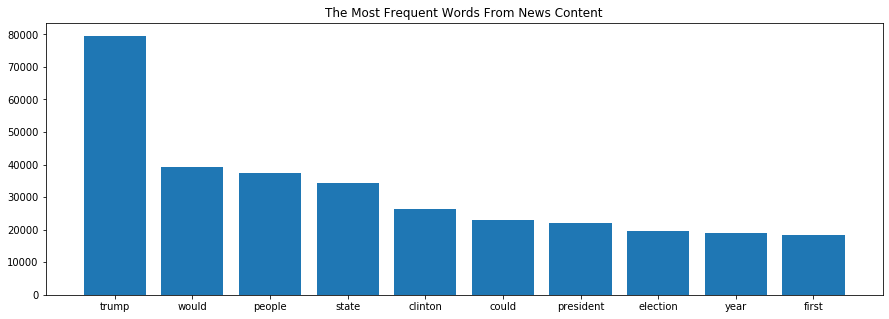

In [60]:
plt.figure(figsize=(15,5))
plt.bar(*zip(*fdist.most_common(10)))
plt.title('The Most Frequent Words From News Content')

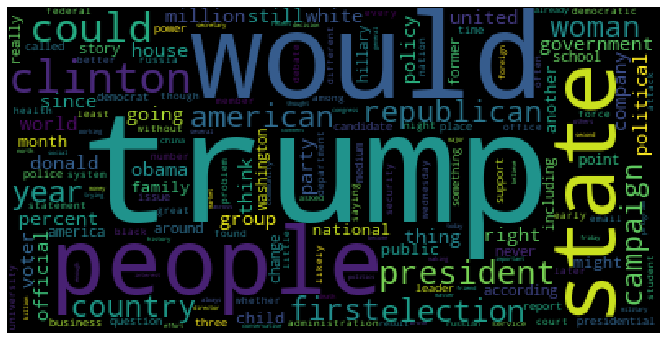

In [15]:
plt.figure(figsize=(15,6))
wordcloud = WordCloud().generate_from_frequencies(fdist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### News Title Analysis

In [18]:
# data cleaning for title column
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.lemmatize(word) for word in review if not word in stopwords.words('english') and len(word) > 4]
    review = ' '.join(review)
    corpus.append(review)

all_words = []
for text in corpus:
    all_words.append(text.split())
    
words = [j for i in all_words for j in i]

from nltk.probability import FreqDist
fdist = FreqDist(words)
print(fdist)

<FreqDist with 12316 samples and 82809 outcomes>


Text(0.5, 1.0, 'The Most Frequent Words')

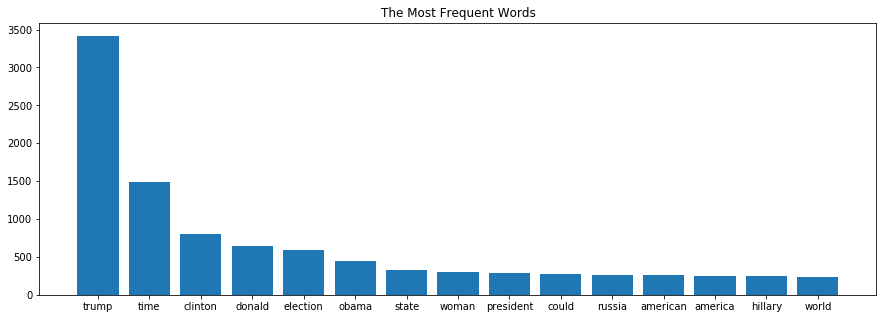

In [38]:
# with word length > 4
plt.figure(figsize=(15,5))
plt.bar(*zip(*fdist.most_common(15)))
plt.title('The Most Frequent Words')

In [61]:
# bigram model for title
def n_grams(words):
    ngrams = {}
    # words = 2
    ngram = []
    for paragraph in corpus:
        words_tokens = nltk.word_tokenize(paragraph)
        for i in range(len(words_tokens)-words):
            seq = ' '.join(words_tokens[i:i+words])
            ngram.append(seq)
            if  seq not in ngrams.keys():
                ngrams[seq] = []
            ngrams[seq].append(words_tokens[i+words])
    
    return ngram
    
bigram = n_grams(2)
fdist = FreqDist(bigram)
print(fdist.most_common(20))

[('donald trump', 12611), ('united state', 8318), ('hillary clinton', 6358), ('white house', 4274), ('islamic state', 2449), ('president obama', 2278), ('secretary state', 2222), ('can not', 2204), ('trump campaign', 2055), ('supreme court', 1889), ('obama administration', 1879), ('north carolina', 1843), ('barack obama', 1835), ('presidential election', 1762), ('social medium', 1758), ('prime minister', 1664), ('clinton campaign', 1640), ('climate change', 1540), ('national security', 1502), ('state department', 1495)]


Text(0.5, 1.0, 'The Most Frequent Words with bigrams')

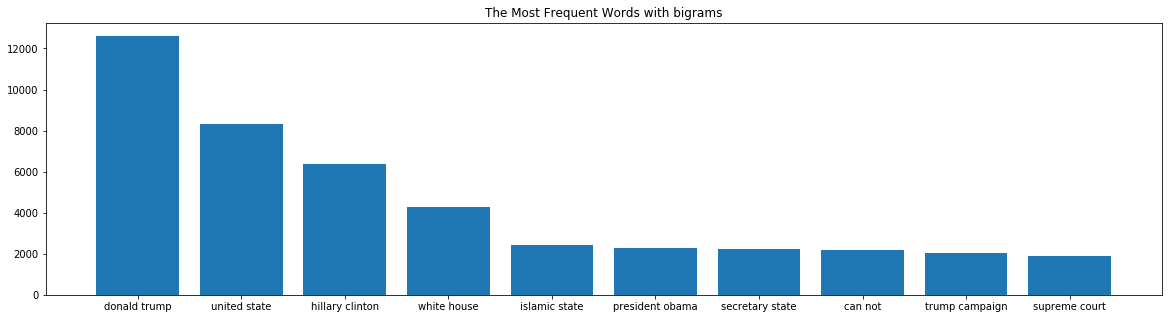

In [62]:
plt.figure(figsize=(20,5))
plt.bar(*zip(*fdist.most_common(10)))
plt.title('The Most Frequent Words with bigrams')

In [46]:
# trigram model with
bigram = n_grams(3)
fdist = FreqDist(bigram)
print(fdist.most_common(20))

[('atlantic politics policy', 53), ('politics policy daily', 51), ('dakota access pipeline', 15), ('north dakota pipeline', 12), ('black life matter', 11), ('friday evening briefing', 11), ('president elect trump', 11), ('wednesday evening briefing', 10), ('monday evening briefing', 10), ('police officer killed', 9), ('trump white house', 9), ('policy daily trump', 9), ('north carolina governor', 8), ('white working class', 8), ('donald trump victory', 7), ('aleppo donald trump', 7), ('electoral college trump', 7), ('trump cabinet pick', 7), ('trump national security', 7), ('president trump could', 7)]


Text(0.5, 1.0, 'The Most Frequent Words with trigrams')

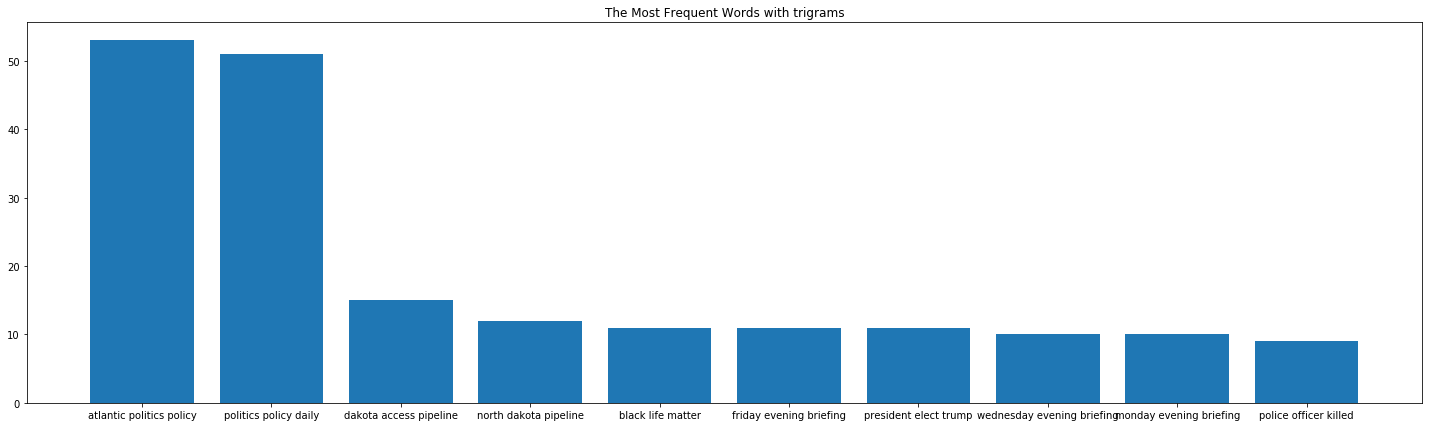

In [55]:
plt.figure(figsize=(25,7))
plt.bar(*zip(*fdist.most_common(10)))
plt.title('The Most Frequent Words with trigrams')

In [22]:
df.columns

Index(['id', 'title', 'publication', 'date', 'year', 'month', 'content'], dtype='object')

Text(0.5, 1.0, 'Publications')

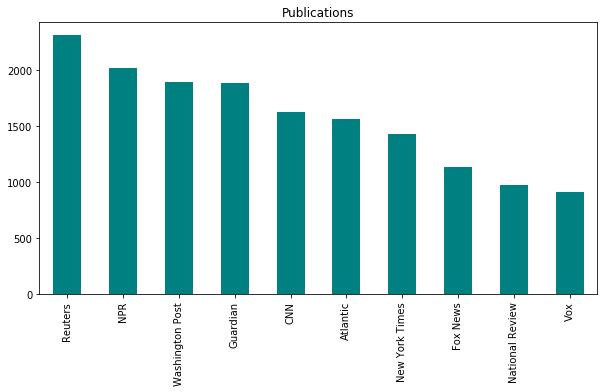

In [53]:
plt.figure(figsize=(10,5))
df['publication'].value_counts().plot(kind="bar", color='teal')
plt.title('Publications')